Reference: 
https://blog.dominodatalab.com/shap-lime-python-libraries-part-1-great-explainers-pros-cons/
https://shap.readthedocs.io/en/latest/

In [84]:
# Load Libraries
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import sklearn.ensemble
import numpy as np
import lime
import lime.lime_tabular
import shap
shap.initjs()  # need to run this to display Javacript in Jupyter notebook
import xgboost as xgb
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
import time
%matplotlib inline

In [ ]:
# Load Boston Housing Data
X,y = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X,y = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
X.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [31]:
y[:2]

array([24. , 21.6])

In [2]:
# K Nearest Neighbor
knn = sklearn.neighbors.KNeighborsRegressor()
knn.fit(X_train, y_train)

C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\IPython\core\inputtransformer2.py:468: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  warnings.warn("`make_tokens_by_line` received a list of lines which do not have lineending markers ('\\n', '\\r', '\\r\\n', '\\x0b', '\\x0c'), behavior will be unspecified")


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [4]:
# Create the SHAP Explainers
# SHAP has the following explainers: deep, gradient, kernel, linear, tree, sampling
# Must use Kernel method on knn
# Summarizing the data with k-Means is a trick to speed up the processing
 
"""
Rather than use the whole training set to estimate expected values, we summarize with
a set of weighted kmeans, each weighted by the number of points they represent.
Running without kmeans took 1 hr 6 mins 7 sec. Running with kmeans took 2 min 47 sec.
Boston Housing is a small dataset.
Running SHAP on models that require the Kernel method becomes prohibitive. 
"""
 
# build the kmeans summary
X_train_summary = shap.kmeans(X_train, 10)

C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\IPython\core\inputtransformer2.py:468: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  warnings.warn("`make_tokens_by_line` received a list of lines which do not have lineending markers ('\\n', '\\r', '\\r\\n', '\\x0b', '\\x0c'), behavior will be unspecified")


In [5]:
# using the kmeans summary
t0 = time.time()
explainerKNN = shap.KernelExplainer(knn.predict, X_train_summary)

In [6]:
# predictions for test dataset
shap_values_KNN_test = explainerKNN.shap_values(X_test)

C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0

C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0

C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0

C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0

C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\sarad\Anaconda3\envs\resbazml\lib\site-packages\shap\explainers\kernel.py:555: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0

In [90]:
len(X_test)

102

In [91]:
j = 0  # Change here with index of test dataset between 0 to 101
X_test.iloc[[j]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.46,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34


## SHAP: Local Explanation

In [196]:
# now we can plot the SHAP explainer for one record
shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test[j], X_test.iloc[[j]])

### how to convert SHAP value into a probability???

In [93]:
def sigmoid(x):
    return 1 / (1 + math.e ** - x)

In [102]:
sigmoid(explainerKNN.expected_value + np.sum(shap_values_KNN_test[:]))

7.676044082913841e-154

In [106]:
sigmoid(explainerKNN.expected_value)

0.9999999999930911

In [113]:
sigmoid(10.7)

0.9999774555703496

## SHAP: Global Perspective

In [198]:
shap_values_KNN_test[:2]

array([[ 5.05731981e-02, -1.91799344e+00, -1.27880885e-01,
         0.00000000e+00,  6.08060354e-03, -4.73673161e-03,
        -3.09235211e-01,  6.84980953e-03, -2.21337385e-02,
        -4.49814257e+00,  3.36214015e-04,  1.09876588e+00,
         7.79299044e-01],
       [-6.88824999e-01, -5.38144573e-01, -3.40422610e-01,
         0.00000000e+00,  1.41335070e-03,  1.64436031e-02,
        -5.09569433e-01, -1.75463835e-02,  4.08755111e-01,
        -6.36182063e-01, -3.88893446e-02,  3.26061924e+00,
         2.92413028e+00]])

In [111]:
# now we can plot the SHAP explainer for one record
shap.force_plot(explainerKNN.expected_value, shap_values_KNN_test, feature_names = X_test.columns)

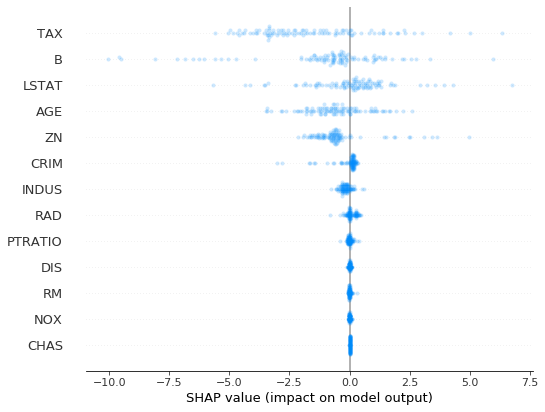

In [118]:
shap.summary_plot(shap_val_all, feature_names = X_test.columns, plot_type = 'dot', alpha = 0.2)

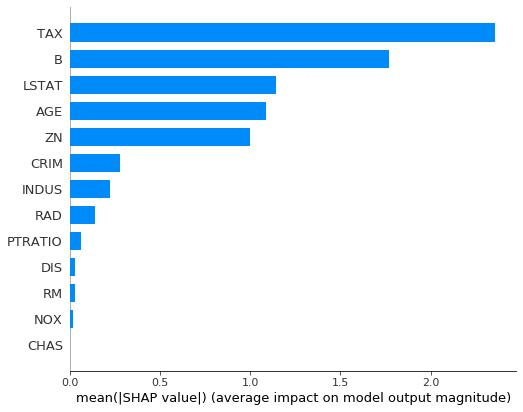

In [107]:
shap.summary_plot(shap_val_all, feature_names = X_test.columns, plot_type = 'bar')